In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

pd.set_option('display.max_rows', 200)

In [6]:
np.random.seed(123)

## Import data

In [7]:
df = pd.read_parquet("./train_data_merged.parquet")
df

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,customer_obs
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,1
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,2
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,3
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,4
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531447,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0,2017-11-05,0.979333,0.416013,0.020818,0.828199,0.003487,0.090743,0.005340,...,NaN,NaN,0.006838,0.003680,0.000457,NaN,0.000905,0.001498,0.002774,9
531448,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0,2017-12-23,0.984907,0.296536,0.007209,0.812610,0.005904,0.079886,0.002243,...,NaN,NaN,0.003310,0.007097,0.007857,NaN,0.002777,0.008225,0.008856,10
531449,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0,2018-01-06,0.983019,0.443984,0.013151,0.815422,0.003457,0.100503,0.002111,...,NaN,NaN,0.009955,0.009994,0.001088,NaN,0.005693,0.006773,0.005566,11
531450,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0,2018-02-06,0.969861,0.442553,0.009855,1.003541,0.005117,0.101802,0.009930,...,NaN,NaN,0.005541,0.006564,0.009883,NaN,0.008123,0.001168,0.003983,12


#### Based on distribution plots from *data_exploration* notebook and challenge information, we know that random noise [0,0.01] was added to int columns. It will be removed by checking highest intervals between sorted variable values

In [8]:
static_columns = ['D_63', 'D_64', 'D_66', 'D_68', 'B_30', 'B_31', 'B_38', 'D_114',
       'D_116', 'D_117', 'D_120', 'D_126']

non_continous = ["customer_ID", "target", "S_2", "customer_obs", "D_87"]
non_continous = static_columns + non_continous
continous_columns = df.drop(non_continous, axis=1).columns

In [74]:
fractions_dict = {}
adjustment_dict = {}

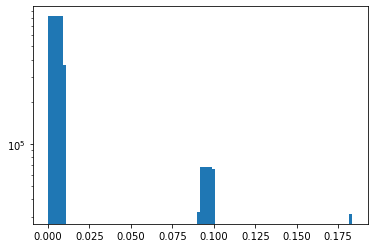

In [960]:
col_name = "D_145"
new_col = pd.Series(df[col_name])
new_col = new_col[new_col < new_col.quantile(.9)]  

plt.hist(new_col, bins=100)
plt.yscale('log')
plt.show()

In [973]:
count, division = np.histogram(new_col, 1000)
count_0 = count == 0

flag=True
for i in range(1, len(count)):
    if (count_0[i] == False) and (count_0[i-1] == True):
        if flag:
            break;
        flag=True
interval = (abs(division.min()) + division[i]) - (abs(division.min()) + division[0])
interval

0.090872504

In [974]:
1/11

0.09090909090909091

In [975]:
if division.min() < -1e-3:
    adjustment_dict[col_name] = abs(division.min())

In [3]:
adjustment_dict

{'S_11': 0.19999874,
 'D_59': 0.10243006,
 'S_15': 0.29999977,
 'D_124': 0.04545438}

In [977]:
fractions_dict[col_name] = interval

In [978]:
fractions_dict

{'B_4': 0.012736882,
 'D_39': 0.02938403,
 'D_44': 0.122004956,
 'R_2': 0.99755514,
 'D_49': 0.013936693,
 'B_8': 0.99746364,
 'D_51': 0.33219412,
 'R_3': 0.09857999,
 'S_6': 0.9916193,
 'D_54': 0.9927377,
 'R_4': 0.99611366,
 'R_5': 0.49982786,
 'D_59': 0.017477974,
 'S_11': 0.0392451,
 'D_65': 0.025307983,
 'B_16': 0.08071324,
 'B_20': 0.057059113,
 'B_30': 0.99,
 'B_38': 1.0,
 'B_22': 0.49103406,
 'D_70': 0.24910009,
 'D_72': 0.33236253,
 'S_15': 0.09825803,
 'D_74': 0.07116508,
 'D_75': 0.06618899,
 'D_78': 0.49475214,
 'D_79': 0.49333993,
 'R_8': 0.99724036,
 'R_9': 0.16454491,
 'D_80': 0.19964169,
 'R_10': 0.99967766,
 'R_11': 0.49099845,
 'D_81': 0.9994632,
 'D_82': 0.4931534,
 'R_13': 0.031366557,
 'D_83': 0.9906936,
 'R_15': 0.99983954,
 'D_84': 0.49334884,
 'R_16': 0.49336123,
 'S_18': 0.9961892,
 'D_86': 0.99684334,
 'R_17': 0.02819217,
 'R_18': 0.032191586,
 'R_19': 0.99433124,
 'B_32': 0.9954661,
 'S_20': 0.99197996,
 'R_20': 0.99594074,
 'R_21': 0.99392325,
 'B_33': 0.999

In [979]:
import pickle


with open('adjustment_dict.pickle', 'wb') as file:
    pickle.dump(adjustment_dict, file, protocol=pickle.HIGHEST_PROTOCOL)

with open('fractions_dict.pickle', 'wb') as file:
    pickle.dump(fractions_dict, file, protocol=pickle.HIGHEST_PROTOCOL)